In [140]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline


plt.rcParams['figure.figsize'] = [16, 7]


In [141]:
df = pd.read_csv("./twitchdata-update.csv")
df.head()


Channel  Watch time(Minutes)  Stream time(minutes)  Peak viewers  \
0     xQcOW           6196161750                215250        222720   
1  summit1g           6091677300                211845        310998   
2    Gaules           5644590915                515280        387315   
3  ESL_CSGO           3970318140                517740        300575   
4      Tfue           3671000070                123660        285644   

   Average viewers  Followers  Followers gained  Views gained  Partnered  \
0            27716    3246298           1734810      93036735       True   
1            25610    5310163           1370184      89705964       True   
2            10976    1767635           1023779     102611607       True   
3             7714    3944850            703986     106546942       True   
4            29602    8938903           2068424      78998587       True   

   Mature    Language  
0   False     English  
1   False     English  
2    True  Portuguese  
3   False     English  
4   False     English

In [142]:
df.dtypes


Channel                 object
Watch time(Minutes)      int64
Stream time(minutes)     int64
Peak viewers             int64
Average viewers          int64
Followers                int64
Followers gained         int64
Views gained             int64
Partnered                 bool
Mature                    bool
Language                object
dtype: object

In [143]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Channel               1000 non-null   object
 1   Watch time(Minutes)   1000 non-null   int64 
 2   Stream time(minutes)  1000 non-null   int64 
 3   Peak viewers          1000 non-null   int64 
 4   Average viewers       1000 non-null   int64 
 5   Followers             1000 non-null   int64 
 6   Followers gained      1000 non-null   int64 
 7   Views gained          1000 non-null   int64 
 8   Partnered             1000 non-null   bool  
 9   Mature                1000 non-null   bool  
 10  Language              1000 non-null   object
dtypes: bool(2), int64(7), object(2)
memory usage: 72.4+ KB


In [144]:
df.describe()


Watch time(Minutes)  Stream time(minutes)   Peak viewers  \
count         1.000000e+03           1000.000000    1000.000000   
mean          4.184279e+08         120515.160000   37065.051000   
std           5.496355e+08          85376.201364   60314.307686   
min           1.221928e+08           3465.000000     496.000000   
25%           1.631899e+08          73758.750000    9113.750000   
50%           2.349908e+08         108240.000000   16676.000000   
75%           4.337399e+08         141843.750000   37569.750000   
max           6.196162e+09         521445.000000  639375.000000   

       Average viewers     Followers  Followers gained  Views gained  
count      1000.000000  1.000000e+03      1.000000e+03  1.000000e+03  
mean       4781.040000  5.700541e+05      2.055185e+05  1.166817e+07  
std        8453.684965  8.044134e+05      3.399137e+05  2.490572e+07  
min         235.000000  3.660000e+03     -1.577200e+04  1.757880e+05  
25%        1457.750000  1.705462e+05      4.375825e+04  3.880602e+06  
50%        2425.000000  3.180630e+05      9.835200e+04  6.456324e+06  
75%        4786.250000  6.243322e+05      2.361308e+05  1.219676e+07  
max      147643.000000  8.938903e+06      3.966525e+06  6.701375e+08

In [145]:
df.var()


Watch time(Minutes)     3.020992e+17
Stream time(minutes)    7.289096e+09
Peak viewers            3.637816e+09
Average viewers         7.146479e+07
Followers               6.470809e+11
Followers gained        1.155413e+11
Views gained            6.202950e+14
Partnered               2.153754e-02
Mature                  1.772773e-01
dtype: float64

In [146]:
df.skew()

Watch time(Minutes)      5.165895
Stream time(minutes)     2.598804
Peak viewers             4.528788
Average viewers          9.066586
Followers                4.549879
Followers gained         5.342437
Views gained            19.085191
Partnered               -6.527236
Mature                   1.285099
dtype: float64

In [147]:
X = df[["Watch time(Minutes)", "Stream time(minutes)", "Peak viewers",
        "Average viewers", "Followers", "Followers gained", "Views gained"]]
# remove the skewness by doing log transformation
X=np.log(X)


In [148]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler
X_sca = MinMaxScaler()
X = X_sca.fit_transform(X)


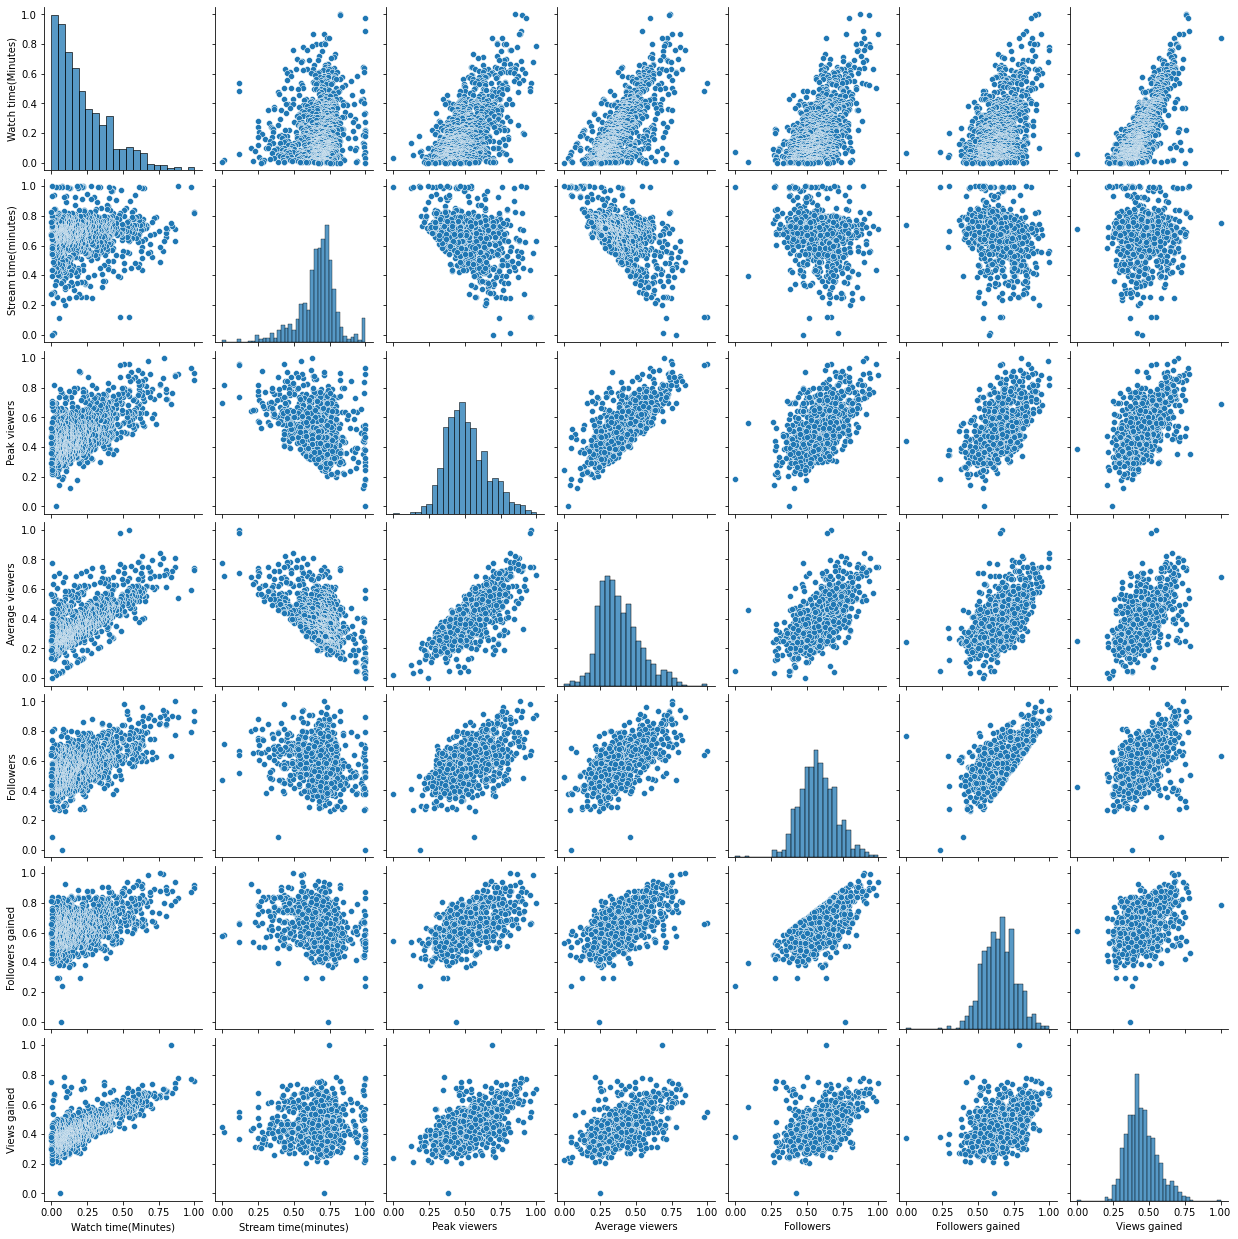

In [149]:
import seaborn as sns
# Creating new dataframe with selected columns
df_new = pd.DataFrame(data=X, columns=["Watch time(Minutes)", "Stream time(minutes)",
                   "Peak viewers", "Average viewers", "Followers", "Followers gained", "Views gained"])
sns.pairplot(df_new)


In [150]:
df_new.skew()


Watch time(Minutes)     1.184732
Stream time(minutes)   -0.825461
Peak viewers            0.505345
Average viewers         0.692484
Followers               0.148671
Followers gained       -0.127681
Views gained            0.587337
dtype: float64

In [151]:
X = np.array(df_new["Followers"])
y = np.array(df_new["Average viewers"])
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)
print(X.shape, y.shape)


(1000, 1) (1000, 1)


In [152]:
# Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [153]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)


LinearRegression()

In [154]:
y_pred = reg.predict(X_test)

In [155]:
reg.score(X_train, y_train)

0.4207213020458338

In [156]:
# r^2 score
reg.score(X_test,y_test)

0.32815413293353324

In [157]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

k=5
kf = KFold(n_splits=k)

model = LinearRegression()

result = cross_val_score(model, X, y, cv=kf, scoring='r2')
print("Avg accuracy: {}".format(result.mean()))
# Negative accuracy should not be possible
# Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse) for r2 score
# It seems the cross_val_score awaits a predefined train_test_split object.

result = cross_val_score(model, X_train, y_train, cv=kf,scoring='r2')
print("Average Accuracy: {}".format(result.mean()))

Avg accuracy: -0.15458113264268705
Average Accuracy: 0.42211708912398394


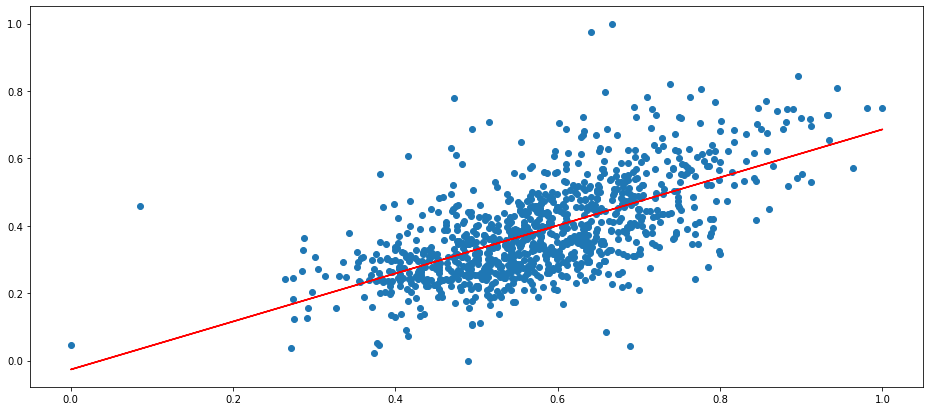

In [158]:
# Plotting the graph
plt.scatter(X,y)
plt.plot(X_train,reg.predict(X_train),color="red")
plt.show()

In [159]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_test, y_pred)

0.012345756441887214

In [160]:
r2 = r2_score(y_test, y_pred)
# Ideal r2_score is 1
print(r2)


0.32815413293353324
